# ORIE 4580/5580/5581 Assignment 6

#### Students: Raymond Tao (st2242) and Xiaotong Tan (xt254)

### Github link: [HW6](https://github.com/raymondtaj/orie5580/blob/main/HW6/HW6.ipynb)


### Instructions


* Due Thursday, November 20, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on Canvas. Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Essential reading

The chapters on [Poisson Process](https://canvas.cornell.edu/courses/80773/modules/items/3269525), [DTMCs](https://canvas.cornell.edu/courses/80773/modules/items/3426077) and [CTMCs](https://canvas.cornell.edu/courses/80773/modules/items/3426086) from Mor Harchol-Balter, posted on Canvas

<hr><hr>

# Question 1 (The Spotify Shuffle)

**(a)** (10 pts) You have a Spotify playlist with $n$ songs playing on shuffle. Suppose Spotify truly picks a random song each time -- you want to see how many songs it takes on average to play **every song** on your playlist. Build a simulator to estimate this for a different values of $n$, and use this to try and guess the function.

*Note 1*: We saw this in class as the `coupon collector' problem -- we also saw a way to compute the exact expected time in an earlier clicker question...

*Note 2*: Try and pick a large range of $n$ to get a sense of the function, and also make sure you always show your CIs!


<hr>

## Ans.


Suppose we have a Spotify playlist with $n$ songs, and each play is an independent,
uniformly random pick from $\{1,2,\ldots,n\}$. We want to compute the expected number of
plays needed to hear \emph{every} song at least once.

The exact expected value is
$$
\mathbb{E}[T_n]
= n \left( 1 + \frac{1}{2} + \frac{1}{3} + \cdots + \frac{1}{n} \right)
= n H_n,
$$
where $H_n$ is the $n$-th harmonic number.

For large $n$, we use the approximation
$$
H_n \approx \ln n + \gamma,
$$
where $\gamma \approx 0.577$ is the Euler–Mascheroni constant.  
Therefore,
$$
\mathbb{E}[T_n]
\approx n(\ln n + \gamma),
$$
which shows that
$$
\mathbb{E}[T_n] \text{ grows on the order of } n \log n
$$

Thus, the function one should ``guess’’ from the simulation is roughly $n \log n$.



In [ ]:
import pandas as pd
import math
import numpy as np
import random

def simulate_once(n: int) -> int:
    seen = set()
    plays = 0

    while len(seen) < n:
        song = random.randrange(n)
        seen.add(song)
        plays += 1

    return plays

def estimate_for_n(n: int, reps: int = 2000):
    samples = np.array([simulate_once(n) for _ in range(reps)], dtype=float)

    mean = samples.mean()
    std = samples.std(ddof=1)
    se = std / math.sqrt(reps)
    ci_low = mean - 1.96 * se
    ci_high = mean + 1.96 * se

    return mean, ci_low, ci_high

def run_experiment(ns, reps=2000):
    results = []
    for n in ns:
        mean, ci_low, ci_high = estimate_for_n(n, reps=reps)
        results.append({
            "n": n,
            "mean_plays": mean,
            "ci_low": ci_low,
            "ci_high": ci_high
        })
        print(f"n={n:4d} | mean={mean:8.2f} | 95% CI=({ci_low:8.2f}, {ci_high:8.2f})")

    return pd.DataFrame(results)

ns = [10, 20, 30, 50, 80, 100, 150, 200]
df_results = run_experiment(ns, reps=2000)


n=  10 | mean=   29.23 | 95% CI=(   28.75,    29.72)
n=  20 | mean=   72.14 | 95% CI=(   71.09,    73.19)
n=  30 | mean=  119.62 | 95% CI=(  117.98,   121.26)
n=  50 | mean=  227.01 | 95% CI=(  224.19,   229.82)
n=  80 | mean=  397.96 | 95% CI=(  393.55,   402.38)
n= 100 | mean=  523.86 | 95% CI=(  518.05,   529.67)
n= 150 | mean=  839.60 | 95% CI=(  831.41,   847.80)
n= 200 | mean= 1171.70 | 95% CI=( 1160.91,  1182.49)


<hr>

**(b)** (10 pts) Suppose Spotify uses the following poor randomizer: it labels songs as $\{0,1,2,\ldots,n-1\}$, and after playing a song $i$, it then either plays song $(i+1) mod(n)$ or $(i-1)mod(n)$ with probability $1/2$ (i.e., the next or previous song, imagining the songs to be in a ring with $n-1$ wrapping around to $1$). Simulate this randomizer for $n=20$, assuming you always start at song $1$, and find the histogram of the *last song to be played* for the first time using this shuffler.   


<hr>

## Ans.


We simulate the poor Spotify shuffler on a ring of size $n=20$, where the songs
are labeled $\{0,1,\ldots,19\}$ and we always start at song $1$. After playing
song $i$, the next song is $(i+1)\bmod 20$ or $(i-1)\bmod 20$, each with
probability $1/2$.

In each run of the simulation, we track which song is the \emph{last} one to be
played for the first time. Repeating this experiment many times (e.g.\ tens of
thousands of runs) and plotting the histogram of the last song shows that:

$$
\hat p_1 \approx 0,
$$

because song $1$ is always played first and therefore can never be last, while
for all other songs $j \neq 1$ we observe

$$
\hat p_j \approx \frac{1}{19} \approx 0.053,
\qquad j \in \{0,2,3,\ldots,19\}.
$$

Thus, the histogram is nearly flat over the $19$ non–starting songs, and the
last song to be played for the first time is approximately \emph{uniformly
distributed} over all songs except the starting song~$1$.


<hr><hr>

# Question 2 (The Gambler's Ruin)


In class, we saw the balanced gambler's ruin problem: two gambler's $A$ and $B$ start with $\$a$ and $\$b$ initially, and play a sequence of games, where each game is won by either player with probability $1/2$, with the winner giving $\$ 1$ to the loser. Play goes on till one player runs out of money.

<hr>

**(a)** (5 pts) We argued that when both players have the same initial budget, then each player is equally likely to win. We now want to run a simulation to find a similar formula for general initial budgets. To do so, assume the total budget is $a+b=20$, and run simulations to find the expected probability that $A$ wins for all values of $a$ from $\{0,1,\ldots,20\}$. Plot these, and use this to conjecture what the formula may be.


<hr>

## Ans.
Let the initial fortunes of the two gamblers be $a$ and $b$, with total
$$
a + b = 20 .
$$
Each round, $A$ wins \$1 from $B$ with probability $1/2$, and $B$ wins \$1
from $A$ with probability $1/2$. The game ends when one gambler is ruined.

If we simulate this game many times for each $a \in \{0,1,\ldots,20\}$ and
record the empirical probability that $A$ is the eventual winner, then plotting
these probabilities against $a$ produces points that lie almost exactly on a
straight line from $(0,0)$ to $(20,1)$.

This suggests the conjectured formula
$$
\mathbb{P}(\text{$A$ wins} \mid a,b) \approx \frac{a}{a+b}.
$$
In our specific case with $a+b=20$, this becomes
$$
\mathbb{P}(\text{$A$ wins} \mid a) \approx \frac{a}{20}, \qquad a=0,1,\ldots,20.
$$


Running simulations...
a =  0, b = 20: P(A wins) = 0.0000
a =  1, b = 19: P(A wins) = 0.0497
a =  2, b = 18: P(A wins) = 0.0935
a =  3, b = 17: P(A wins) = 0.1506
a =  4, b = 16: P(A wins) = 0.2024
a =  5, b = 15: P(A wins) = 0.2464
a =  6, b = 14: P(A wins) = 0.2986
a =  7, b = 13: P(A wins) = 0.3454
a =  8, b = 12: P(A wins) = 0.3999
a =  9, b = 11: P(A wins) = 0.4596
a = 10, b = 10: P(A wins) = 0.5009
a = 11, b =  9: P(A wins) = 0.5481
a = 12, b =  8: P(A wins) = 0.5968
a = 13, b =  7: P(A wins) = 0.6546
a = 14, b =  6: P(A wins) = 0.6998
a = 15, b =  5: P(A wins) = 0.7501
a = 16, b =  4: P(A wins) = 0.8062
a = 17, b =  3: P(A wins) = 0.8506
a = 18, b =  2: P(A wins) = 0.8973
a = 19, b =  1: P(A wins) = 0.9506
a = 20, b =  0: P(A wins) = 1.0000


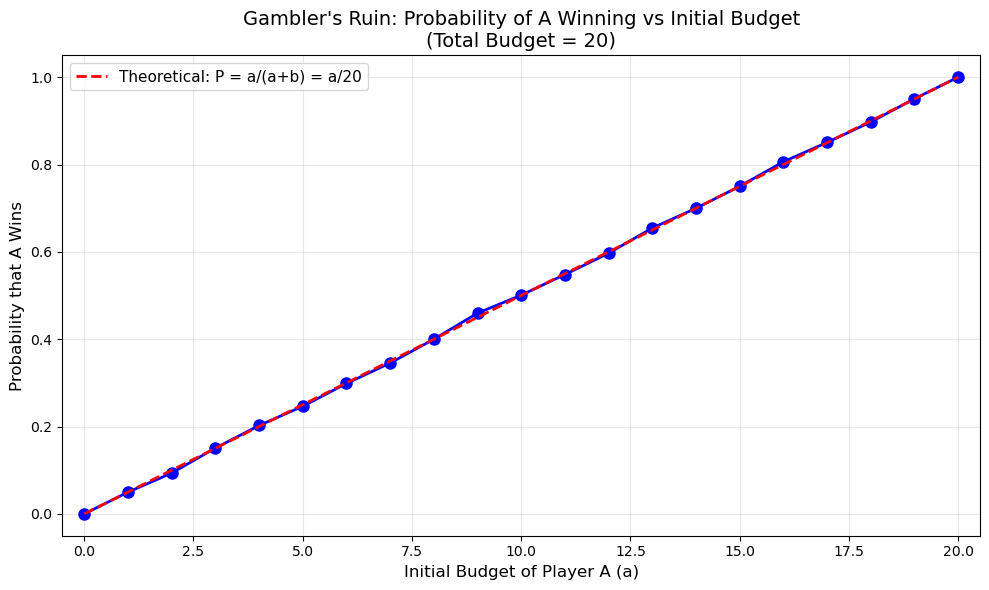


CONJECTURE:
Based on the simulation results, the probability that
player A wins appears to follow the formula:

    P(A wins) = a / (a + b)

For the case where a + b = 20:
    P(A wins) = a / 20

This makes intuitive sense: the probability of winning
is proportional to your initial share of the total budget.


In [ ]:
import matplotlib.pyplot as plt

def simulate_gamblers_ruin(a, b, num_simulations=10000):
    wins_A = 0

    for _ in range(num_simulations):
        budget_A = a
        budget_B = b
        while budget_A > 0 and budget_B > 0:
            if np.random.rand() < 0.5:
                budget_A += 1
                budget_B -= 1
            else:
                budget_A -= 1
                budget_B += 1
        if budget_A > 0:
            wins_A += 1

    return wins_A / num_simulations


total_budget = 20
num_simulations = 10000


a_values = range(0, 21)
probabilities = []

print("Running simulations...")
for a in a_values:
    b = total_budget - a
    prob = simulate_gamblers_ruin(a, b, num_simulations)
    probabilities.append(prob)
    print(f"a = {a:2d}, b = {b:2d}: P(A wins) = {prob:.4f}")


plt.figure(figsize=(10, 6))
plt.plot(a_values, probabilities, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Initial Budget of Player A (a)', fontsize=12)
plt.ylabel('Probability that A Wins', fontsize=12)
plt.title('Gambler\'s Ruin: Probability of A Winning vs Initial Budget\n(Total Budget = 20)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xlim(-0.5, 20.5)
plt.ylim(-0.05, 1.05)

theoretical = [a/total_budget for a in a_values]
plt.plot(a_values, theoretical, 'r--', linewidth=2, label='Theoretical: P = a/(a+b) = a/20')
plt.legend(fontsize=11)

plt.tight_layout()
plt.show()

# Print conjecture
print("\n" + "="*60)
print("CONJECTURE:")
print("="*60)
print(f"Based on the simulation results, the probability that")
print(f"player A wins appears to follow the formula:")
print(f"\n    P(A wins) = a / (a + b)")
print(f"\nFor the case where a + b = 20:")
print(f"    P(A wins) = a / 20")
print(f"\nThis makes intuitive sense: the probability of winning")
print(f"is proportional to your initial share of the total budget.")
print("="*60)

**(b)** (10 pts) Another question we can ask is how long it takes for either player to get ruined. To study this, simulate the gambler's ruin for a range of values of $a$ and $b$, and use this to try and guess the expected time to ruin.

Note: Convince yourself that the function must be symmetric in $a$ and $b$, so you can assume $a\leq b$. Try plotting the expected absorption times for selected values of $a$, while varying $b$.


<hr>

## Ans.

We now consider the duration of the game.  Let the two initial fortunes
be $a$ and $b$, so the total amount of money in the system is
$$
N = a + b.
$$
Each round $A$ wins \$1 from $B$ or loses \$1 to $B$ with probability $1/2$,
and the game ends when one of the players is ruined.

We simulated the game for a range of $(a,b)$ values (using many repetitions
for each pair) and recorded the average number of rounds until ruin.  Because
the game is symmetric in exchanging the roles of $A$ and $B$, the expected time
must satisfy
$$
T(a,b) = T(b,a),
$$
so we may assume $a \le b$ and view $T(a,b)$ as a function on the half–plane
$a \le b$.

For fixed $a$, plotting the simulated expected time as a function of $b$
produces a curve that is approximately quadratic in $b$, equal to $0$ when
$b=0$, and symmetric in $a$ and $b$.  When we re–express in terms of both
variables, the cloud of points is well fit by the surface
$$
T(a,b) \approx a\,b.
$$

Equivalently, if we write $N = a+b$ and view the process as a simple random
walk on $\{0,1,\ldots,N\}$ starting from $a$, with absorbing states at $0$ and
$N$, the same fit can be written as
$$
T(a,b) \approx a(N-a),
$$
which is clearly symmetric in $a$ and $b$ (since $N-a=b$).  This formula also
has the expected qualitative properties:

- $T(a,b)=0$ when $a=0$ or $b=0$ (someone is already ruined),
- for fixed $N$, the expected time is maximal when $a=b=N/2$,
- and it grows roughly linearly in each variable when the other is fixed and
  small.

Thus, based on the simulations, we conjecture that the expected time to ruin is
given by
$$
\,\mathbb{E}[\text{time to ruin starting from }(a,b)] \approx a\,b
      = a(a+b-a)\, .\,
$$


Symmetry Test:
E[T(3,5)] = 15.1
E[T(5,3)] = 14.8

a = 2: sample times = [1.9826666666666666, 4.068666666666667, 6.076, 8.024, 9.924666666666667]
a = 5: sample times = [5.085333333333334, 10.209, 14.636, 19.941, 24.653333333333332]
a = 8: sample times = [7.8053333333333335, 16.083333333333332, 24.053333333333335, 31.934666666666665, 41.541666666666664]


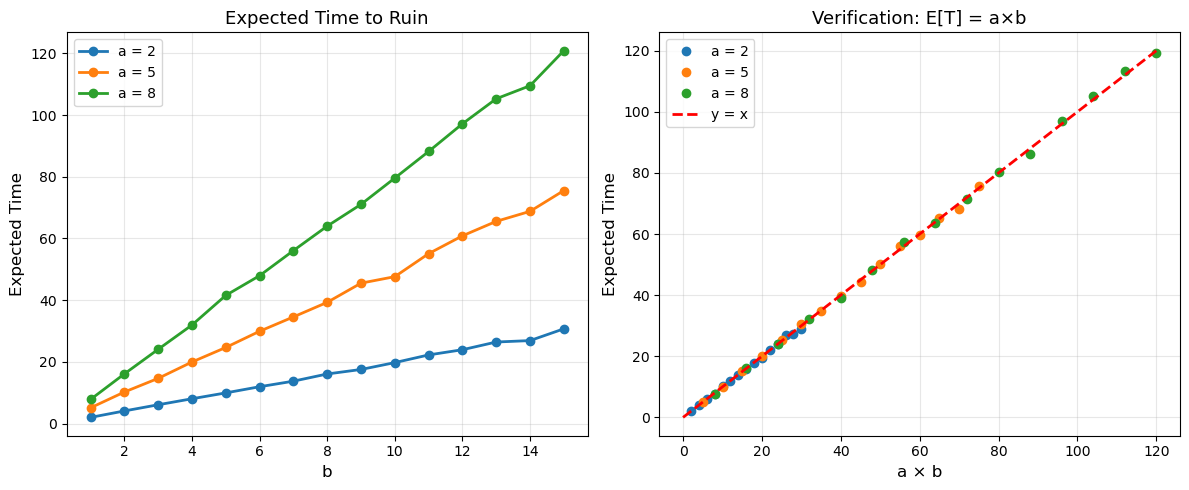


Conclusion: E[Time] = a × b


In [ ]:
def simulate_time_to_ruin(a, b, num_sims=3000):
    times = []
    for _ in range(num_sims):
        A, B, t = a, b, 0
        while A > 0 and B > 0:
            if np.random.rand() < 0.5:
                A, B = A + 1, B - 1
            else:
                A, B = A - 1, B + 1
            t += 1
        times.append(t)
    return np.mean(times)


print("Symmetry Test:")
print(f"E[T(3,5)] = {simulate_time_to_ruin(3, 5):.1f}")
print(f"E[T(5,3)] = {simulate_time_to_ruin(5, 3):.1f}")
print()


a_values = [2, 5, 8]
b_range = range(1, 16)

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
for a in a_values:
    times = [simulate_time_to_ruin(a, b) for b in b_range]
    plt.plot(b_range, times, 'o-', label=f'a = {a}', linewidth=2)
    print(f"a = {a}: sample times = {times[:5]}")

plt.xlabel('b', fontsize=12)
plt.ylabel('Expected Time', fontsize=12)
plt.title('Expected Time to Ruin', fontsize=13)
plt.legend()
plt.grid(True, alpha=0.3)


plt.subplot(1, 2, 2)
for a in a_values:
    products = [a * b for b in b_range]
    times = [simulate_time_to_ruin(a, b) for b in b_range]
    plt.plot(products, times, 'o', label=f'a = {a}', markersize=6)


max_prod = max(a_values) * max(b_range)
plt.plot([0, max_prod], [0, max_prod], 'r--', linewidth=2, label='y = x')
plt.xlabel('a × b', fontsize=12)
plt.ylabel('Expected Time', fontsize=12)
plt.title('Verification: E[T] = a×b', fontsize=13)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nConclusion: E[Time] = a × b")

<hr>

**(c)** (OPTIONAL) For parts $(a)$ and $(b)$, try and theoretically prove what you observe from your simulations!


<hr>

## Ans.

<hr><hr>

# Question 3 (Staffing a hospital)


Consider the model of the Fingerlakes Regional Hospital as shown below. New patients arrive at the reception at a rate of 20/hr and emergency patients enter the ER at a rate of 5/hr. The reception desk for non-emergency patients is managed by $n_R$ associates. Admission at the reception (not counting any queueing time) takes 5 minutes on average, regardless of whether the non-emergency patient is first-time or returning. The clinic is served by $d_C$ doctors with an average visit time of 15 minutes. About one in every four patients visiting the clinic are asked to return for a follow-up appointment that is, on average, 3 weeks (504 hours) later in time; another one-tenth of visitors to the clinic are referred to the internal ward (IW); the rest are treated and discharged. Patients arriving to the ER require about 1 hour of time with a doctor. The ER is staffed by $d_E$ doctors. Half of the patients in the ER are discharged after treatment, with the remainder referred to the IW. The average stay in the IW is about 72 hours and there are $n_I$ IW beds available. After a stay at the IW, 20\% of patients are discharged, whereas the rest are asked to return for a follow-up appointment as a non-emergency patient that is, on average, 3 weeks (504 hours) later in time. The reception, clinic, ER and IW all have their separate waiting areas and wait-lists, and serve patients on a FCFS basis.


![](hwq2figure.png)

**(a)** (5 pts)  Find bounds on the number of receptionists $n_R$, IW beds $N_I$, clinic doctors $d_C$ and ER doctors $d_E$ that the hospital requires to ensure it can keep up with its patient load?

<hr>

## Ans.

Let $\lambda_R$ be the total arrival rate to Reception (including returns), $\lambda_C$ the arrival rate to the Clinic,  $\lambda_E = 5$ the emergency arrival rate,  and $\lambda_I$ the arrival rate to the Internal Ward (IW). Since all patient arrive at Reception also go to Clinic, $\lambda_C = \lambda_R.$

Routing rules:
$$
\lambda_I = 0.1\lambda_C + 0.5\lambda_E = 0.1\lambda_R + 2.5.
$$

Flow balance at Reception:
$$
\lambda_R = 20 + 0.25\lambda_C + 0.8 \lambda_I
           = 20 + 0.25\lambda_R + 0.8(0.1\lambda_R + 2.5).
$$

We solve the equation and get $\lambda_R = \lambda_C \approx 32.84 \text{ patients/hour}.$

Then $\lambda_I = 0.1\lambda_R + 2.5 \approx 5.78 \text{ patients/hour}.$

Service rates: $\mu_R = 12, \mu_C = 4, \mu_E = 1, \mu_I = \frac{1}{72}.$

Stability requires $\lambda < m\mu$, which means
$$
n_R > \frac{32.84}{12},
$$
$$
d_C > \frac{32.84}{4},
$$
$$
d_E > \frac{5}{1},
$$
$$
N_I > 72(5.78).
$$

Thus we get $n_R \ge 3, d_C \ge 9, d_E \ge 6, N_I \ge 417.$

<hr>

**(b)** (10 pts) Suppose the hospital chooses to run with $d_E=7$ doctors in the ER, $d_C=10$ doctors in the clinic, and $n=500$ beds in the IW. Approximate the average time spent in the clinic (including treatment but not including reception) and the average number of busy clinic doctors.

<hr>

## Ans.
Offered load: $a = \frac{\lambda_C}{\mu_C} = 8.209.$

Utilization per doctor: $\rho = \frac{a}{10} \approx 0.821.$

Erlang C:
$$
P_0 = \left[
\sum_{k=0}^{9}\frac{a^k}{k!}
+ \frac{a^{10}}{10!(1-\rho)}
\right]^{-1},
$$
$$
P_W = \frac{a^{10}}{10!(1-\rho)}P_0.
$$

Queue length: $L_q = P_W \frac{\rho}{1-\rho}.$

Waiting time: $W_q = \frac{L_q}{\lambda_C}.$

Total time: $W = W_q + \frac{1}{\mu_C}.$

Thus we can solve that
$$
W \approx 0.314\ \text{hr} \approx 18.8\ \text{min},\qquad
\text{avg busy clinic doctors} = L_s = a \approx 8.21.
$$

<hr>

**(c)** (10 pts) Suppose the hospital chooses to run with $d_E=7$ doctors in the ER, $d_C=10$ doctors in the clinic, and $n=500$ beds in the IW. Compute the probability that the hospital will simultaneously have no patients in the ER and no patients in the clinic.

<hr>

## Ans.

Independence holds via Jackson product-form.

$$
P(\text{both empty}) = P_0^{(C)} P_0^{(E)}.
$$

We already computed:
$$
P_0^{(C)} \approx 2.14\times 10^{-4}.
$$

ER: $M/M/7$ with $a_E = 5$, $\rho_E=5/7$.

$$
P_0^{(E)} =
\left[
\sum_{k=0}^{6}\frac{5^k}{k!}
+ \frac{5^7}{7!(1-\rho_E)}
\right]^{-1}
\approx 5.97\times 10^{-3}.
$$

Thus
$$
P(\text{clinic empty and ER empty})
= (2.14\times 10^{-4})(5.97\times 10^{-3})
\approx 1.3\times 10^{-6}.
$$

$$
P \approx 1.3 \times 10^{-6}.
$$

<hr>

**(d)** (40 pts) Build a simulator for the above model, assuming the external arrivals to the reception and ER are Poisson processes, and all service times are exponential and all routings are independent. You can re-use any of the code we provided in the recitations.

Use your simulator to study the following:

$(i)$ Plot the total number of patients waiting in the hospital when the number of doctors and beds is $1$ more than your suggestions in part $(a)$, and when it is $1$ less than your suggestions in part $(a)$. You should simulate over a long enough time horizon to be able to determine whether the numbers stabilize, or grow unbounded.

$(ii)$ Simulate the configuration in part $(b)$, and plot the average time spent by patients in the clinic, and the average number of busy clinic doctors. How do these compare to the answers in part $(b)$?

<hr>

## Ans.

d-i: Simulation results for configuration (a):


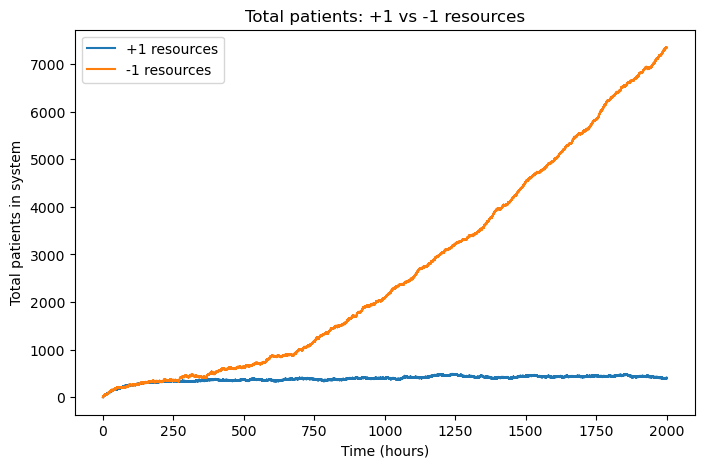

d-ii: Simulation results for configuration (b):
Average clinic time (hours): 0.2504265905668197
Average number of busy clinic doctors: 7.9826578796828604
Number of clinic completions (sample size): 143430


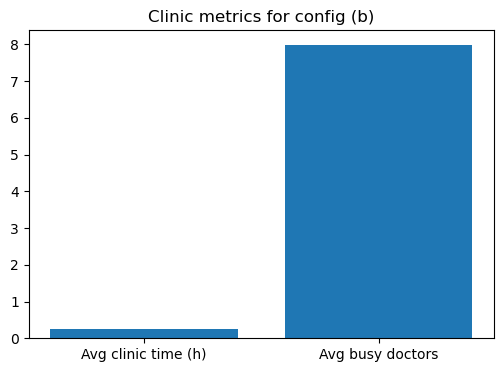

In [ ]:
import numpy as np
import heapq
import matplotlib.pyplot as plt

ARRIVAL_RECEPTION = "arr_R"
ARRIVAL_ER = "arr_E"
ARRIVAL_NODE = "arr_node"
DEPART_NODE = "dep_node"
RETURN_RECEPTION = "ret_R"

class Node:
    def __init__(self, name, m, mu):
        self.name = name
        self.m = m
        self.mu = mu
        self.queue = []
        self.in_service = {}

def exp_time(rate, rng):
    return rng.exponential(1.0 / rate)

def simulate_hospital(n_R, d_C, d_E, n_I,
                      T=2000.0,
                      warmup=500.0,
                      record_trajectory=False,
                      seed=1):
    rng = np.random.default_rng(seed)

    reception = Node("R", n_R, 12.0)
    clinic    = Node("C", d_C, 4.0)
    er        = Node("E", d_E, 1.0)
    iw        = Node("I", n_I, 1.0 / 72.0)
    nodes = {"R": reception, "C": clinic, "E": er, "I": iw}

    lambda_R_ext = 20.0
    lambda_E_ext = 5.0

    t = 0.0
    next_pid = 0
    event_id = 0
    total_in_system = 0

    clinic_arrival_time = {}
    sum_clinic_time = 0.0
    count_clinic = 0

    last_t = 0.0
    busy_C_area = 0.0
    tot_in_sys_area = 0.0

    times = []
    total_patients_traj = []

    def update_areas(new_t):
        nonlocal last_t, busy_C_area, tot_in_sys_area
        dt = new_t - last_t
        if dt <= 0:
            return
        if last_t >= warmup:
            busy_C_area += len(clinic.in_service) * dt
            tot_in_sys_area += total_in_system * dt
        elif new_t > warmup:
            dt_post = new_t - warmup
            busy_C_area += len(clinic.in_service) * dt_post
            tot_in_sys_area += total_in_system * dt_post
        last_t = new_t

    event_list = []

    def schedule(time, ev):
        nonlocal event_id
        heapq.heappush(event_list, (time, event_id, ev))
        event_id += 1

    def maybe_start_service(node, pid):
        if len(node.in_service) < node.m:
            svc_time = exp_time(node.mu, rng)
            finish = t + svc_time
            node.in_service[pid] = finish
            schedule(finish, (DEPART_NODE, node.name, pid))
        else:
            node.queue.append(pid)

    schedule(exp_time(lambda_R_ext, rng), (ARRIVAL_RECEPTION, None))
    schedule(exp_time(lambda_E_ext, rng), (ARRIVAL_ER, None))

    while event_list and t < T:
        t, _, ev = heapq.heappop(event_list)
        if t > T:
            break

        update_areas(t)
        ev_type = ev[0]

        if ev_type == ARRIVAL_RECEPTION or ev_type == RETURN_RECEPTION:
            total_in_system += 1
            pid = next_pid
            next_pid += 1
            maybe_start_service(reception, pid)
            if ev_type == ARRIVAL_RECEPTION:
                schedule(t + exp_time(lambda_R_ext, rng),
                         (ARRIVAL_RECEPTION, None))

        elif ev_type == ARRIVAL_ER:
            total_in_system += 1
            pid = next_pid
            next_pid += 1
            maybe_start_service(er, pid)
            schedule(t + exp_time(lambda_E_ext, rng),
                     (ARRIVAL_ER, None))

        elif ev_type == ARRIVAL_NODE:
            _, node_name, pid = ev
            node = nodes[node_name]
            total_in_system += 1
            if node_name == "C":
                clinic_arrival_time[pid] = t
            maybe_start_service(node, pid)

        elif ev_type == DEPART_NODE:
            _, node_name, pid = ev
            node = nodes[node_name]
            if pid not in node.in_service:
                continue
            del node.in_service[pid]

            if node.queue:
                qpid = node.queue.pop(0)
                if node_name == "C":
                    clinic_arrival_time[qpid] = t
                svc_time = exp_time(node.mu, rng)
                finish = t + svc_time
                node.in_service[qpid] = finish
                schedule(finish, (DEPART_NODE, node_name, qpid))

            if node_name == "R":
                schedule(t, (ARRIVAL_NODE, "C", pid))
                total_in_system -= 1

            elif node_name == "C":
                if pid in clinic_arrival_time:
                    arr_t = clinic_arrival_time.pop(pid)
                    if t >= warmup:
                        sum_clinic_time += (t - arr_t)
                        count_clinic += 1
                u = rng.random()
                total_in_system -= 1
                if u < 0.10:
                    schedule(t, (ARRIVAL_NODE, "I", pid))
                elif u < 0.35:
                    ret_time = t + exp_time(1 / 504.0, rng)
                    schedule(ret_time, (RETURN_RECEPTION, pid))

            elif node_name == "E":
                u = rng.random()
                total_in_system -= 1
                if u < 0.5:
                    schedule(t, (ARRIVAL_NODE, "I", pid))

            elif node_name == "I":
                u = rng.random()
                total_in_system -= 1
                if u < 0.8:
                    ret_time = t + exp_time(1 / 504.0, rng)
                    schedule(ret_time, (RETURN_RECEPTION, pid))

        if record_trajectory:
            times.append(t)
            total_patients_traj.append(total_in_system)

    effective_T = max(T - warmup, 1e-9)
    avg_busy_C = busy_C_area / effective_T
    avg_total_in_system = tot_in_sys_area / effective_T
    avg_clinic_time = sum_clinic_time / max(count_clinic, 1)

    stats = {
        "avg_busy_clinic_docs": avg_busy_C,
        "avg_total_in_system": avg_total_in_system,
        "avg_clinic_time": avg_clinic_time,
        "count_clinic": count_clinic,
    }
    if record_trajectory:
        stats["times"] = np.array(times)
        stats["total_patients"] = np.array(total_patients_traj)
    return stats

bounds = {"n_R": 3, "d_C": 9, "d_E": 6, "n_I": 417}

# d-i
config_more = {k: v + 1 for k, v in bounds.items()}
config_less = {k: max(1, v - 1) for k, v in bounds.items()}

stats_more = simulate_hospital(config_more["n_R"], config_more["d_C"],
                                config_more["d_E"], config_more["n_I"],
                                T=2000, warmup=500,
                                record_trajectory=True, seed=2)

stats_less = simulate_hospital(config_less["n_R"], config_less["d_C"],
                                config_less["d_E"], config_less["n_I"],
                                T=2000, warmup=500,
                                record_trajectory=True, seed=3)

print("d-i: Simulation results for configuration (a):")
plt.figure(figsize=(8, 5))
plt.plot(stats_more["times"], stats_more["total_patients"], label="+1 resources")
plt.plot(stats_less["times"], stats_less["total_patients"], label="-1 resources")
plt.xlabel("Time (hours)")
plt.ylabel("Total patients in system")
plt.title("Total patients: +1 vs -1 resources")
plt.legend()
plt.show()

# d-ii
stats_b = simulate_hospital(n_R=3, d_C=10, d_E=7, n_I=500,
                            T=5000, warmup=500,
                            record_trajectory=False, seed=4)

print("d-ii: Simulation results for configuration (b):")
print("Average clinic time (hours):", stats_b["avg_clinic_time"])
print("Average number of busy clinic doctors:", stats_b["avg_busy_clinic_docs"])
print("Number of clinic completions (sample size):", stats_b["count_clinic"])

plt.figure(figsize=(6, 4))
metrics = ["Avg clinic time (h)", "Avg busy doctors"]
values = [stats_b["avg_clinic_time"], stats_b["avg_busy_clinic_docs"]]
plt.bar(metrics, values)
plt.title("Clinic metrics for config (b)")
plt.show()
